>  # **Operation : Assignment 1**
---
### **Title:** Does disposable income of a country has any effects on piracy rate?
### **Presented to you by:** มา 6 ทำ 3
> * 6441150126
> *
> *

 # **Information**
> ### Definition:
---
* Disposable income หมายถึง รายได้ที่เหลือจากการจ่ายภาษี
* Piracy หมายถึง การละเมิดลิขสิทธิ์ ซึ่งรวมไปถึงการทำซ้ำ การแจกจ่าย และการได้มาซึ่งทรัพย์สินทางปัญญาซึ่งส่งผลให้เจ้าของลิขสิทธิ์ได้รับความเสียหาย

>### Data used:
---
1. Disposable Income of All Country from year 2011-2017 from [**Source:** [Euromonitor](www.portal.euromonitor.com)]
2. Countries with highest commercial value of unlicensed computer software use worldwide year 2011,2013,2015,2017 [**Source:** [Statista](www.statista.com)]

> ### Hypothesis:
---
> * #### *"Countries with high disposable income should have low piracy rate."*

# ~~Agenda~~ '5 Stage of Grief':
---
1. Data cleaning
2. Preparing data for analyzation
3. Data visualization with graphs and charts
4. My whole life has been a lie
5. Conclusion

# Part 1 : Data Cleaning
---

In [84]:
# call in necessary module

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [85]:
# construct a dataframe1 with csv files from github; file = disposable income

Income = pd.read_csv('https://github.com/purachai-phonwisut/machine_learning_project/raw/main/Data%20cleaned/raw/Disposable_income_adj.csv')
Income

,Geography,Category,Data Type,Unit,Currency Conversion,Current Constant,2011,2012,2013,2014,2015,2016,2017
0,Azerbaijan,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"12,100.4","13,387.7","15,171.3","16,581.1","17,582.4","19,983.5","23,225.3"
1,Bangladesh,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"68,540.6","78,411.0","88,036.1","98,314.5","110,726.9","123,994.2","140,115.3"
2,Cambodia,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"10,895.1","11,462.9","12,178.9","13,208.8","14,245.7","15,621.0","16,650.9"
3,China,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"3,881,003.1","4,352,694.4","4,824,248.7","5,274,231.8","5,715,663.3","6,227,634.1","6,905,378.4"
4,"Hong Kong, China",Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"197,233.6","210,413.9","225,046.0","238,473.1","251,846.5","259,548.5","279,337.5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Spain,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"736,907.0","698,018.0","695,391.3","696,649.0","724,290.1","743,436.6","765,902.1"
99,Sweden,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"168,949.0","176,216.4","181,210.1","187,513.0","194,344.1","202,993.2","211,414.4"
100,Switzerland,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"410,435.0","416,011.6","425,268.0","429,824.9","429,682.3","434,565.4","435,272.0"
101,Turkey,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"40,401.6","44,848.7","52,616.2","59,424.4","67,770.2","75,273.9","89,600.5"


In [86]:
# construct a dataframe2 with csv files from github; file = value lost due to unlicensed software

Loss = pd.read_csv('https://github.com/purachai-phonwisut/machine_learning_project/raw/main/Data%20cleaned/raw/values_long_format.csv')
Loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  116 non-null    object
 1   2017     116 non-null    object
 2   2015     116 non-null    object
 3   2013     116 non-null    object
 4   2011     116 non-null    object
 5   region   113 non-null    object
dtypes: object(6)
memory usage: 5.6+ KB


In [87]:
# Fix dataframe in df1; changing column name; cleaning data and transform numeric_string into float

Income.rename(columns={'Geography':'Country'}, inplace= True)
numeric_columns = ['2011', '2012', '2013', '2014', '2015', '2016', '2017']
Income[numeric_columns] = Income[numeric_columns].replace({',': ''},regex=True).astype(float)

In [88]:
# Fix dataframe in df2; changing specific country name to match with df1; replacing nan_values as 'NA'; 
# cleaning data and transform numeric_string into float; changing column name

Loss['Country'].replace({'United States': 'USA'}, inplace=True)
Loss.replace({np.nan: "NA"}, inplace=True)
numeric_columns = ['2011', '2013', '2015', '2017']
Loss[numeric_columns] = Loss[numeric_columns].replace({',': ''},regex=True).astype(float)
Loss.rename(columns={"region":"Region"}, inplace=True)

---

# Part 2: Preparing Data for Analyzation
- generate new dataframe from df1 and df2 as df1_complete and df2_complete then merge them together for analysis

In [89]:
# New dataframe to work on from df1; create new column "Income" by finding average disposable income of year 2011-2017

Income["Income"] = Income.iloc[:, 6:13].mean(axis=1).round(2)
Income_comp = Income.iloc[:, [0,13]]
Income_comp

,Country,Income
0,Azerbaijan,16861.67
1,Bangladesh,101162.66
2,Cambodia,13466.19
3,China,5311550.54
4,"Hong Kong, China",237414.16
...,...,...
98,Spain,722942.01
99,Sweden,188948.60
100,Switzerland,425865.60
101,Turkey,61419.36


In [90]:
# New dataframe to work on from df2; create new column "Loss" which represents commercial values lost by unlicensed software;
# finding average commercial value lost of year 2011,2013,2015,2017

Loss["Loss"] = Loss.iloc[:, 1:4].mean(axis=1).round(2)
Loss_comp = Loss.iloc[:, [0,5,6]]
Loss_comp

,Country,Region,Loss
0,Australia,AP,620.67
1,Bangladesh,AP,219.67
2,Brunel,AP,16.67
3,China,AP,8088.67
4,Hong Kong,AP,304.33
...,...,...,...
111,Portugal,WE,154.00
112,Spain,WE,938.67
113,Sweden,WE,315.00
114,Switzerland,WE,438.67


In [91]:
# Merge df1_complete and df2_complete; just like JOIN in SQL; Because both data has some different countries

Income_Loss_avg = pd.merge(Loss_comp,Income_comp, on="Country",how="inner")
Income_Loss_avg

,Country,Region,Loss,Income
0,Australia,AP,620.67,715473.34
1,Bangladesh,AP,219.67,101162.66
2,China,AP,8088.67,5311550.54
3,India,AP,2689.67,1209014.89
4,Indonesia,AP,1234.33,436347.99
...,...,...,...,...
82,Portugal,WE,154.00,133555.91
83,Spain,WE,938.67,722942.01
84,Sweden,WE,315.00,188948.60
85,Switzerland,WE,438.67,425865.60


In [92]:
# Exclude NA and China (Outlier)
Income_Loss_avg_exclude_China_NA = Income_Loss_avg[Income_Loss_avg["Region"] != "NA"][Income_Loss_avg["Country"] != "China"].reset_index(drop=True)
Income_Loss_avg_exclude_China_NA 

C:\Users\User\AppData\Local\Temp\ipykernel_15328\2404193483.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Income_Loss_avg_exclude_China_NA = Income_Loss_avg[Income_Loss_avg["Region"] != "NA"][Income_Loss_avg["Country"] != "China"].reset_index(drop=True)


,Country,Region,Loss,Income
0,Australia,AP,620.67,715473.34
1,Bangladesh,AP,219.67,101162.66
2,India,AP,2689.67,1209014.89
3,Indonesia,AP,1234.33,436347.99
4,Japan,AP,1108.33,2246537.51
...,...,...,...,...
79,Portugal,WE,154.00,133555.91
80,Spain,WE,938.67,722942.01
81,Sweden,WE,315.00,188948.60
82,Switzerland,WE,438.67,425865.60


In [93]:
# New dataframe to work on from df1
Income_comp2 = Income.iloc[:, [0,6,12]]
Income_comp2 = pd.melt(Income_comp2, id_vars='Country', var_name='Year', value_name='Income')
Income_comp2.sort_values(["Country","Year"])

,Country,Year,Income
59,Algeria,2011,34467.4
162,Algeria,2017,60716.2
60,Angola,2011,5785.3
163,Angola,2017,18746.6
42,Argentina,2011,4650.9
...,...,...,...
123,Uzbekistan,2017,18425.8
58,Venezuela,2011,0.0
161,Venezuela,2017,0.0
21,Vietnam,2011,86910.7


In [94]:
# New dataframe to work on from df2
Loss_comp2 = Loss.iloc[:, [0,1,4,5]]
Loss_comp2 = pd.melt(Loss_comp2, id_vars=['Country','Region'], var_name='Year', value_name='Loss')
Loss_comp2.sort_values(["Country","Year"])

,Country,Region,Year,Loss
135,Albania,CEE,2011,6.0
19,Albania,CEE,2017,10.0
179,Algeria,MEA,2011,83.0
63,Algeria,MEA,2017,70.0
160,Argentina,LA,2011,657.0
...,...,...,...,...
88,Yemen,MEA,2017,10.0
205,Zambia,MEA,2011,3.0
89,Zambia,MEA,2017,4.0
206,Zimbabwe,MEA,2011,4.0


In [95]:
# merged 2 dataframes to get m_df2
Income_Loss_2011_2017 = pd.merge(Loss_comp2,Income_comp2, on=["Country", "Year"])
Income_Loss_2011_2017.sort_values(["Country","Year"])

,Country,Region,Year,Loss,Income
138,Algeria,MEA,2011,83.0,34467.4
51,Algeria,MEA,2017,70.0,60716.2
121,Argentina,LA,2011,657.0,4650.9
34,Argentina,LA,2017,308.0,23968.3
87,Australia,AP,2011,763.0,639048.1
...,...,...,...,...,...
49,Uruguay,LA,2017,51.0,30275.1
137,Venezuela,LA,2011,668.0,0.0
50,Venezuela,LA,2017,317.0,0.0
102,Vietnam,AP,2011,395.0,86910.7


In [96]:
# Year 2011
Income_Loss_2011 = Income_Loss_2011_2017[Income_Loss_2011_2017["Year"] == "2011"].iloc[:, 1:5]
Income_Loss_2011

,Region,Year,Loss,Income
87,AP,2011,763.0,639048.1
88,AP,2011,147.0,68540.6
89,AP,2011,8902.0,3881003.1
90,AP,2011,2930.0,851639.2
91,AP,2011,1467.0,314017.4
...,...,...,...,...
169,WE,2011,245.0,133801.9
170,WE,2011,1216.0,736907.0
171,WE,2011,461.0,168949.0
172,WE,2011,514.0,410435.0


In [97]:
# Year 2017
Income_Loss_2017 = Income_Loss_2011_2017[Income_Loss_2011_2017["Year"] == "2017"].iloc[:, 1:5]
Income_Loss_2017

,Region,Year,Loss,Income
0,AP,2017,540.0,790413.8
1,AP,2017,226.0,140115.3
2,AP,2017,6842.0,6905378.4
3,AP,2017,2474.0,1608509.7
4,AP,2017,1095.0,564981.9
...,...,...,...,...
82,WE,2017,137.0,142274.3
83,WE,2017,859.0,765902.1
84,WE,2017,260.0,211414.4
85,WE,2017,399.0,435272.0


# Part 3: Data Visualization with Graphs and Charts 
---

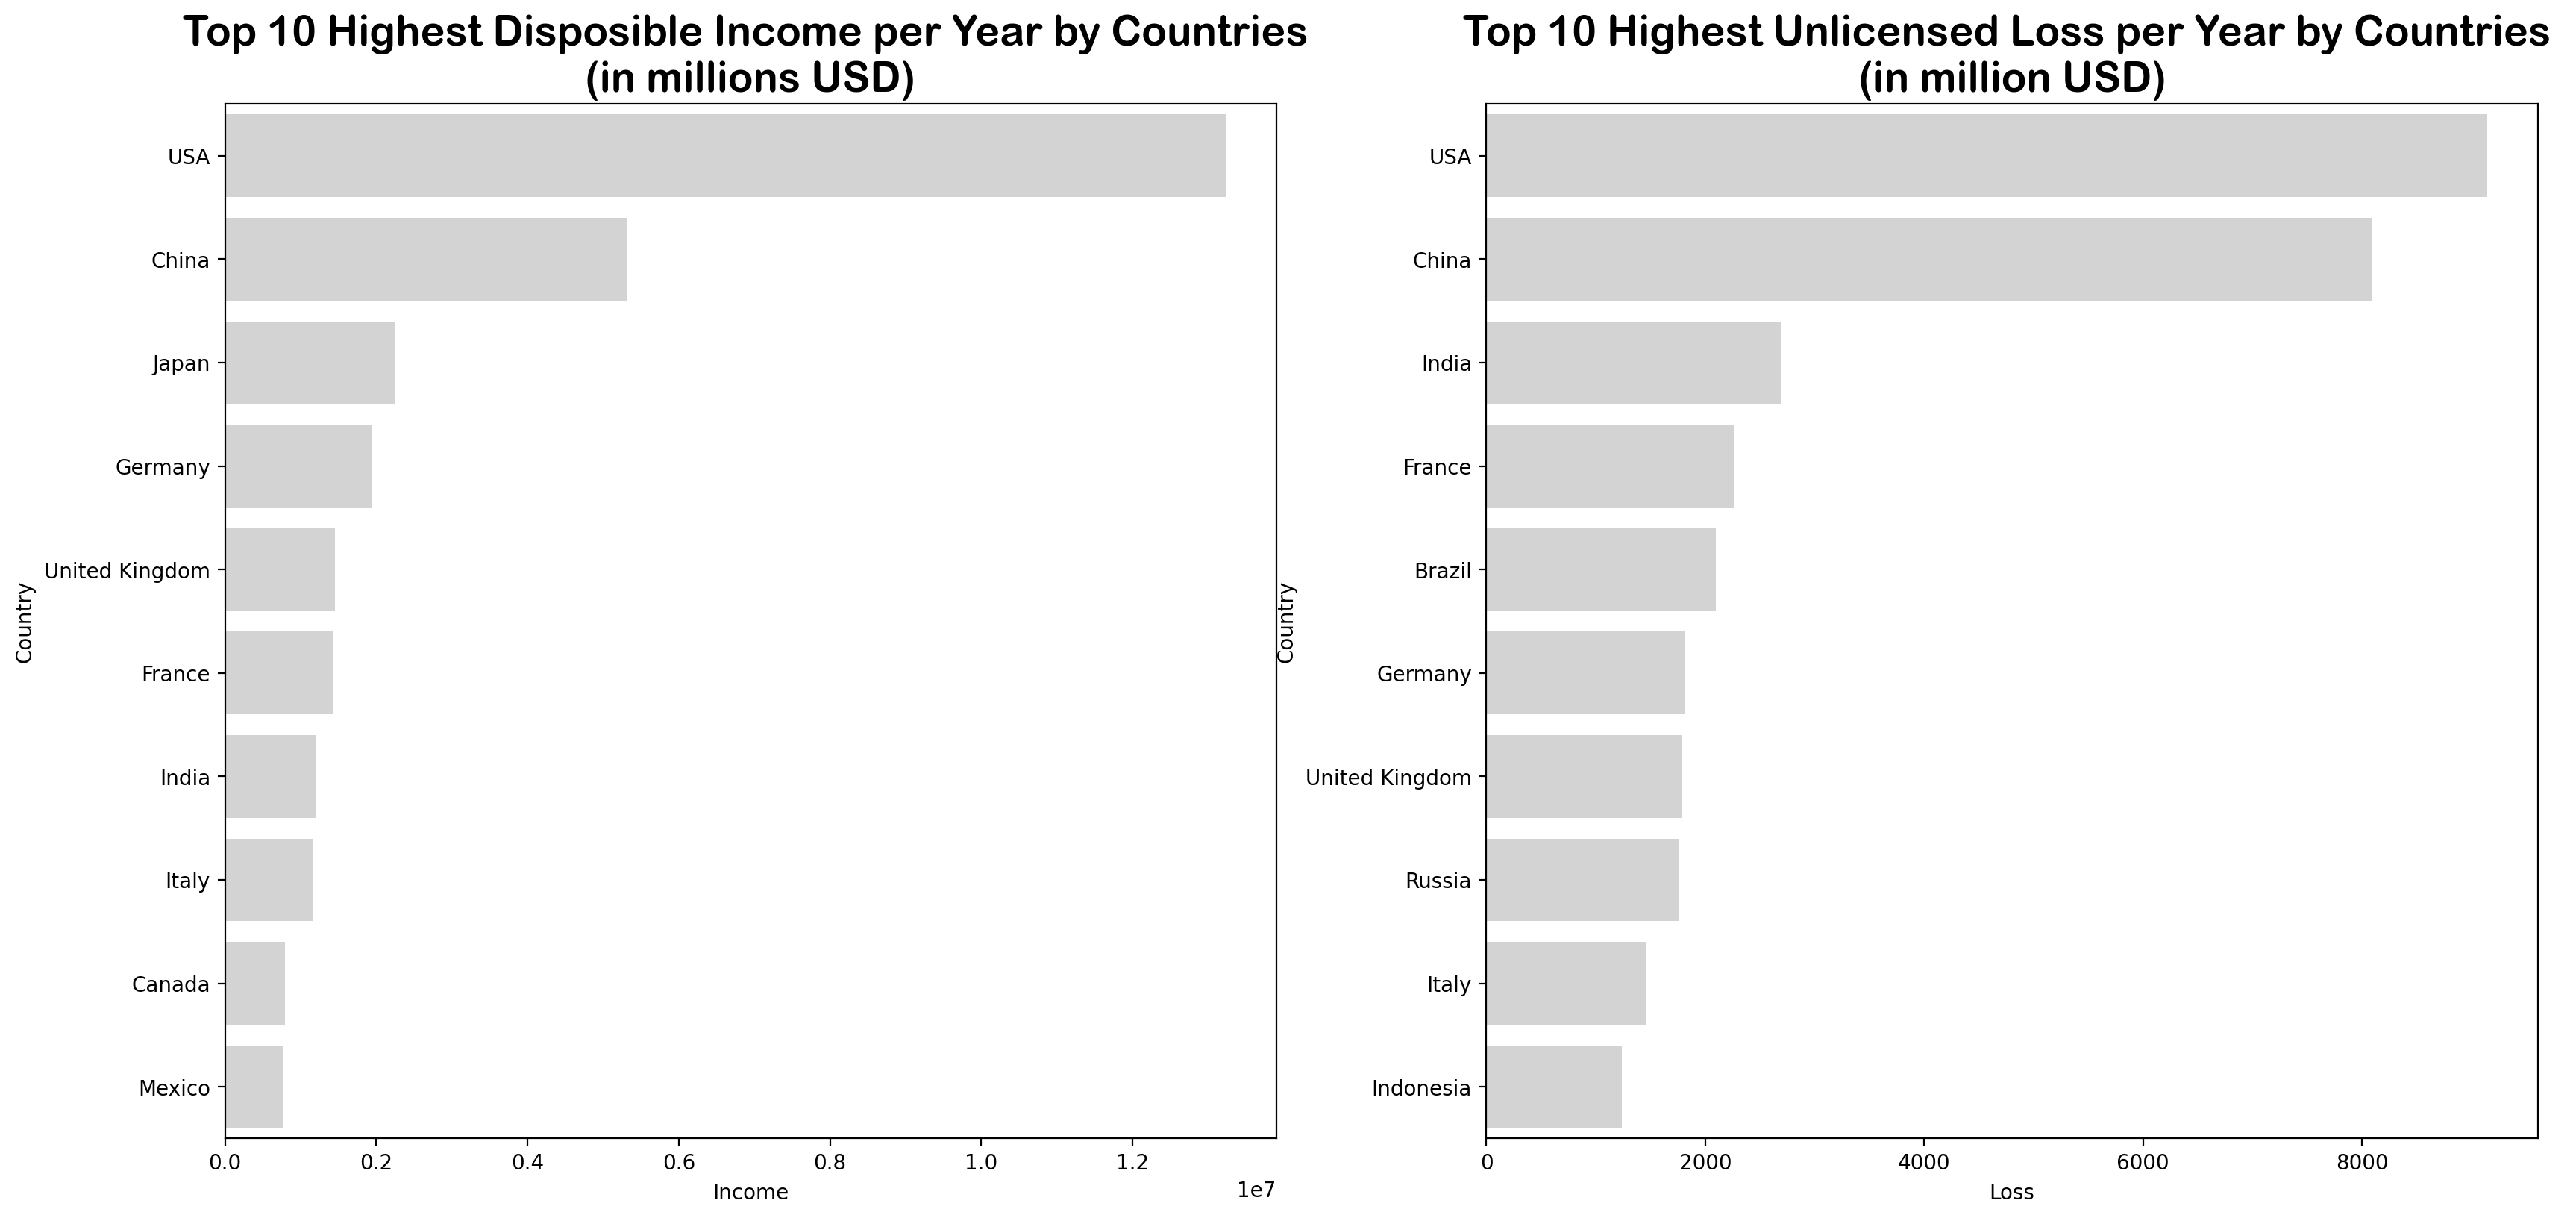

In [98]:
# Highest income & Loss by country
fig, ax = plt.subplots(1, 2, figsize=(20,9))
y_axis = "Country"

grid1 = sns.barplot(x="Income", y=y_axis, data=Income_Loss_avg.sort_values("Income", ascending=False).head(10), ax=ax[0], color="lightgray")
ax[0].set_title("Top 10 Highest Disposible Income per Year by Countries \n(in millions USD)",
                fontsize=20, fontname='Arial Rounded MT Bold')

grid2 = sns.barplot(x="Loss", y=y_axis, data=Income_Loss_avg.sort_values("Loss", ascending=False).head(10), ax=ax[1], color="lightgray")
ax[1].set_title("Top 10 Highest Unlicensed Loss per Year by Countries \n(in million USD)",
                fontsize=20, fontname='Arial Rounded MT Bold');

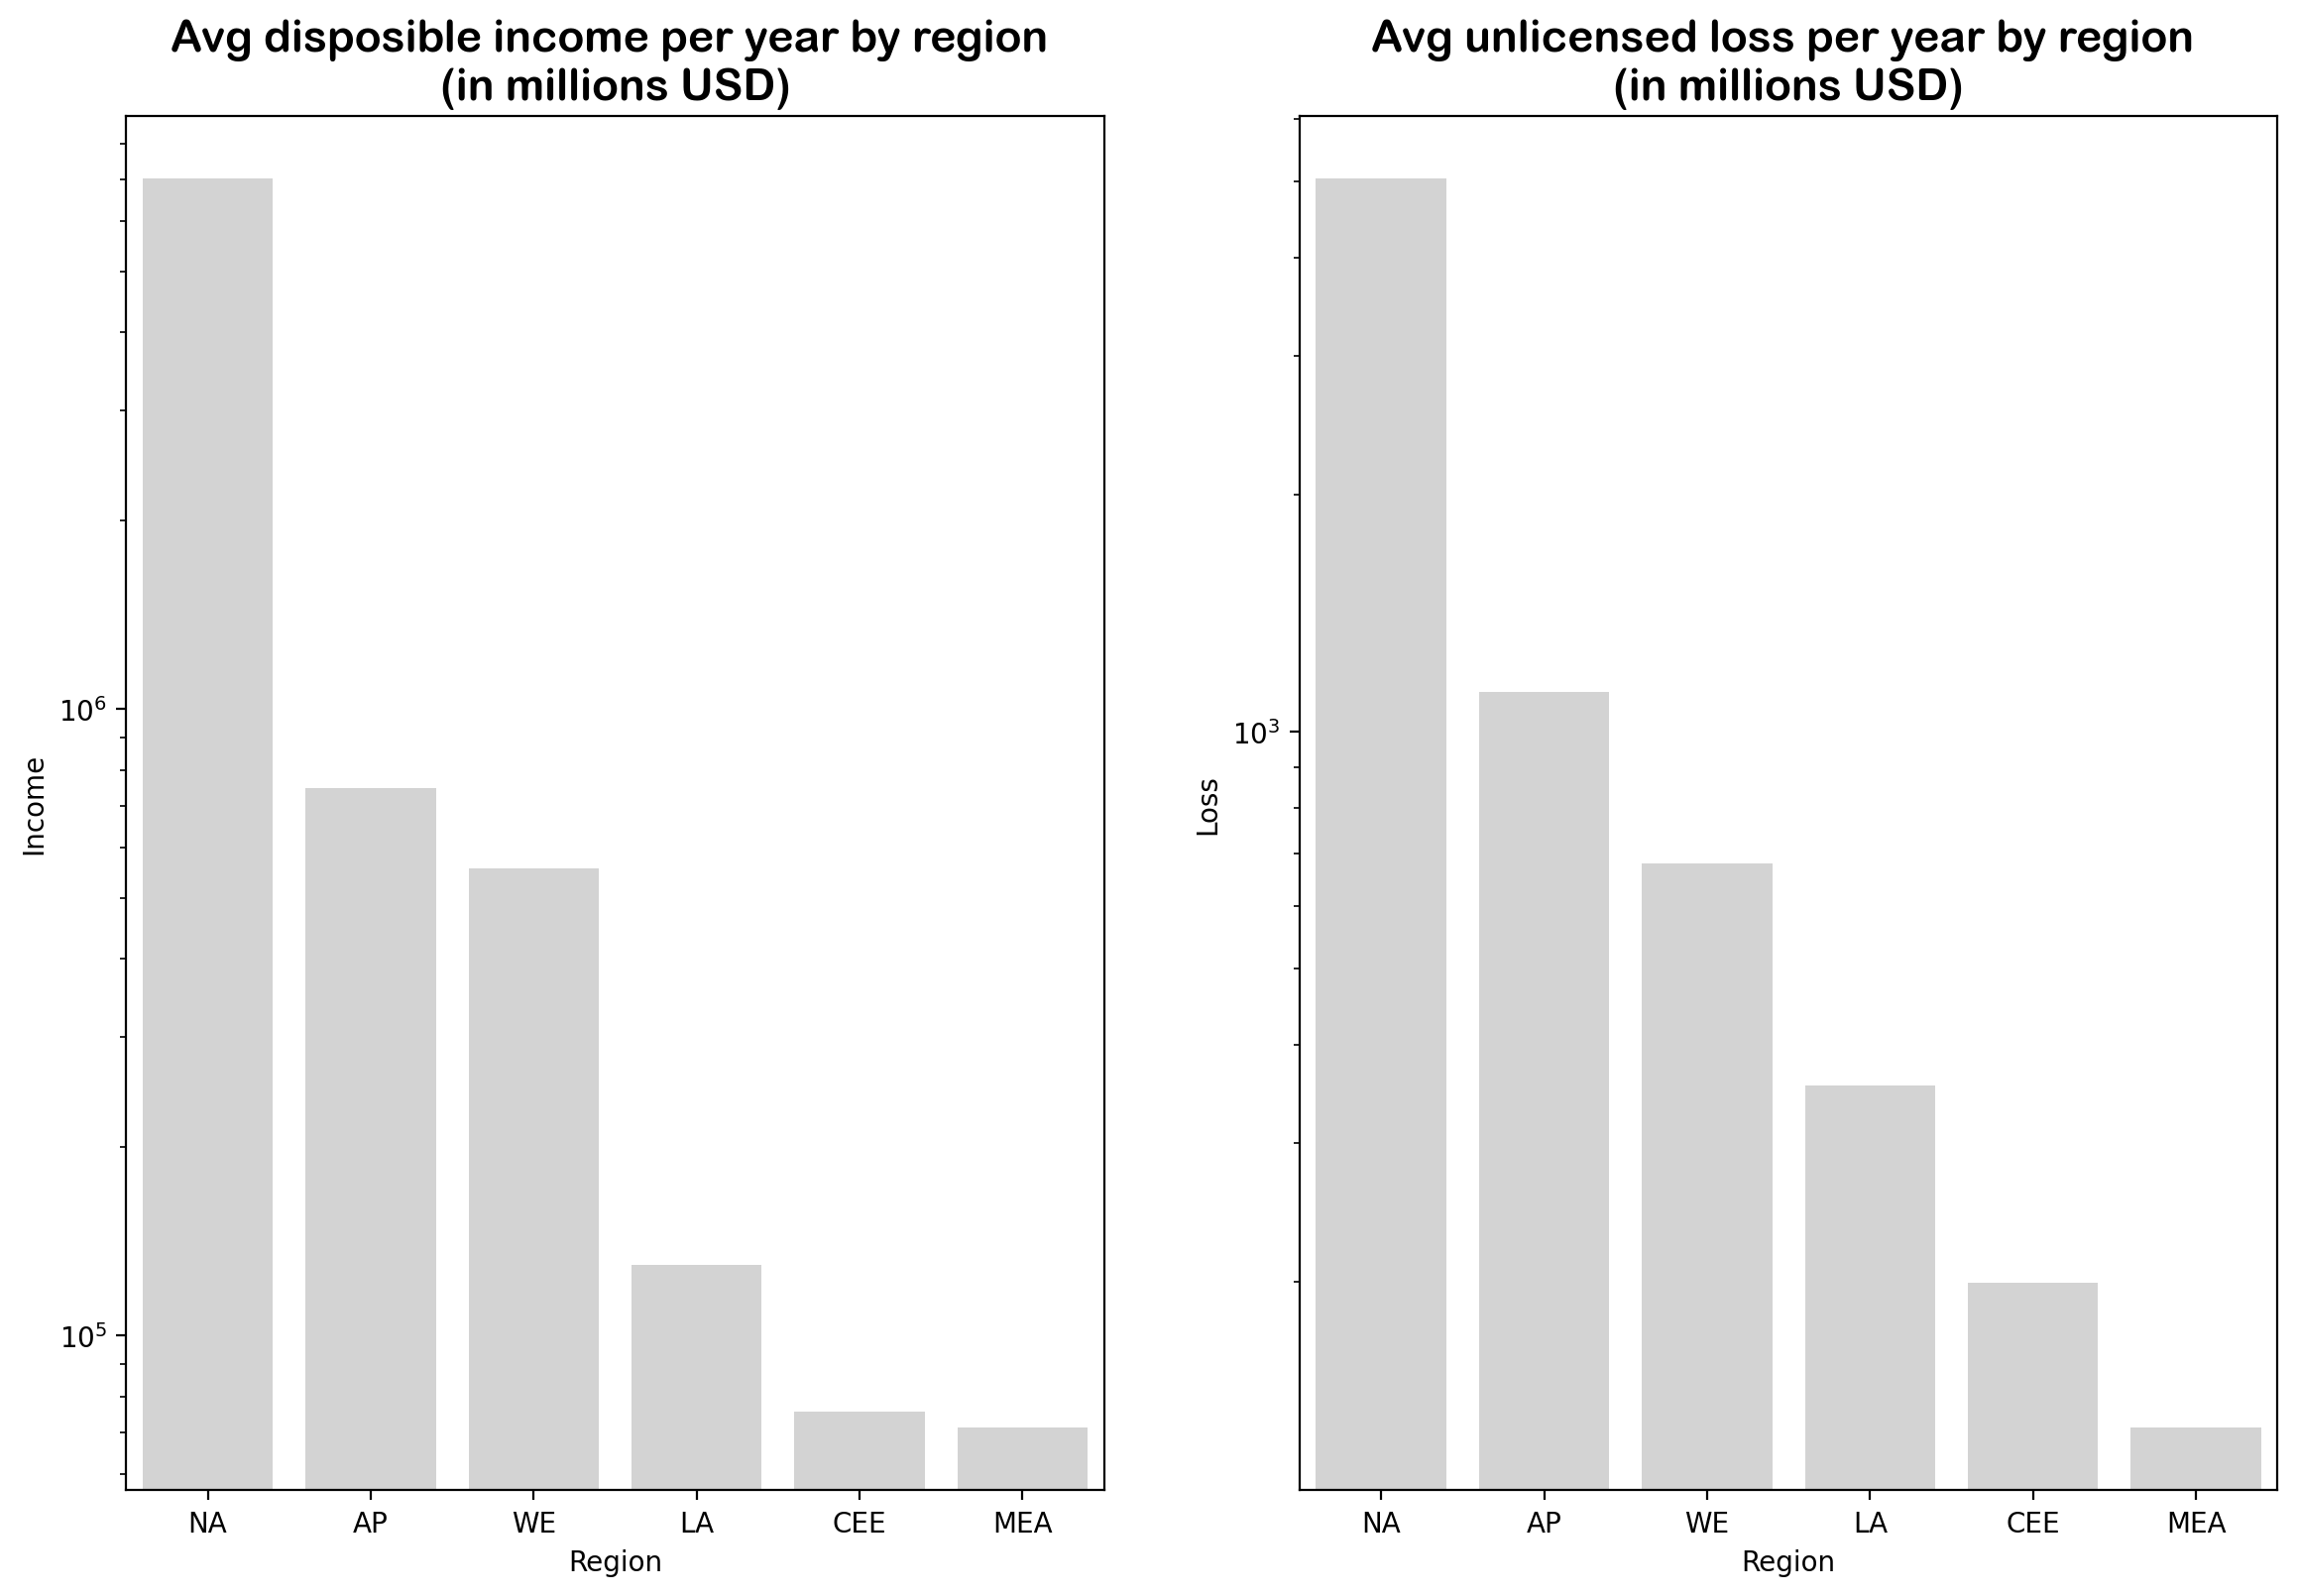

In [99]:
# Highest income & Lost by region
fig, ax = plt.subplots(1, 2, figsize=(14,9))
x_axis = "Region"

grid3 = sns.barplot(x=x_axis, y="Income", data=Income_Loss_avg.sort_values("Income", 
        ascending=False), ax=ax[0], errorbar=None, color="lightgray")
ax[0].set_title("Avg disposible income per year by region \n(in millions USD)",
                fontsize=16, fontname='Arial Rounded MT Bold')

grid4 = sns.barplot(x=x_axis, y="Loss", data=Income_Loss_avg.sort_values("Income",
        ascending=False), ax=ax[1], errorbar=None, color="lightgray")
ax[1].set_title("Avg unlicensed loss per year by region \n(in millions USD)",
                fontsize=16, fontname='Arial Rounded MT Bold')
grid3.set(yscale="log")
grid4.set(yscale="log");

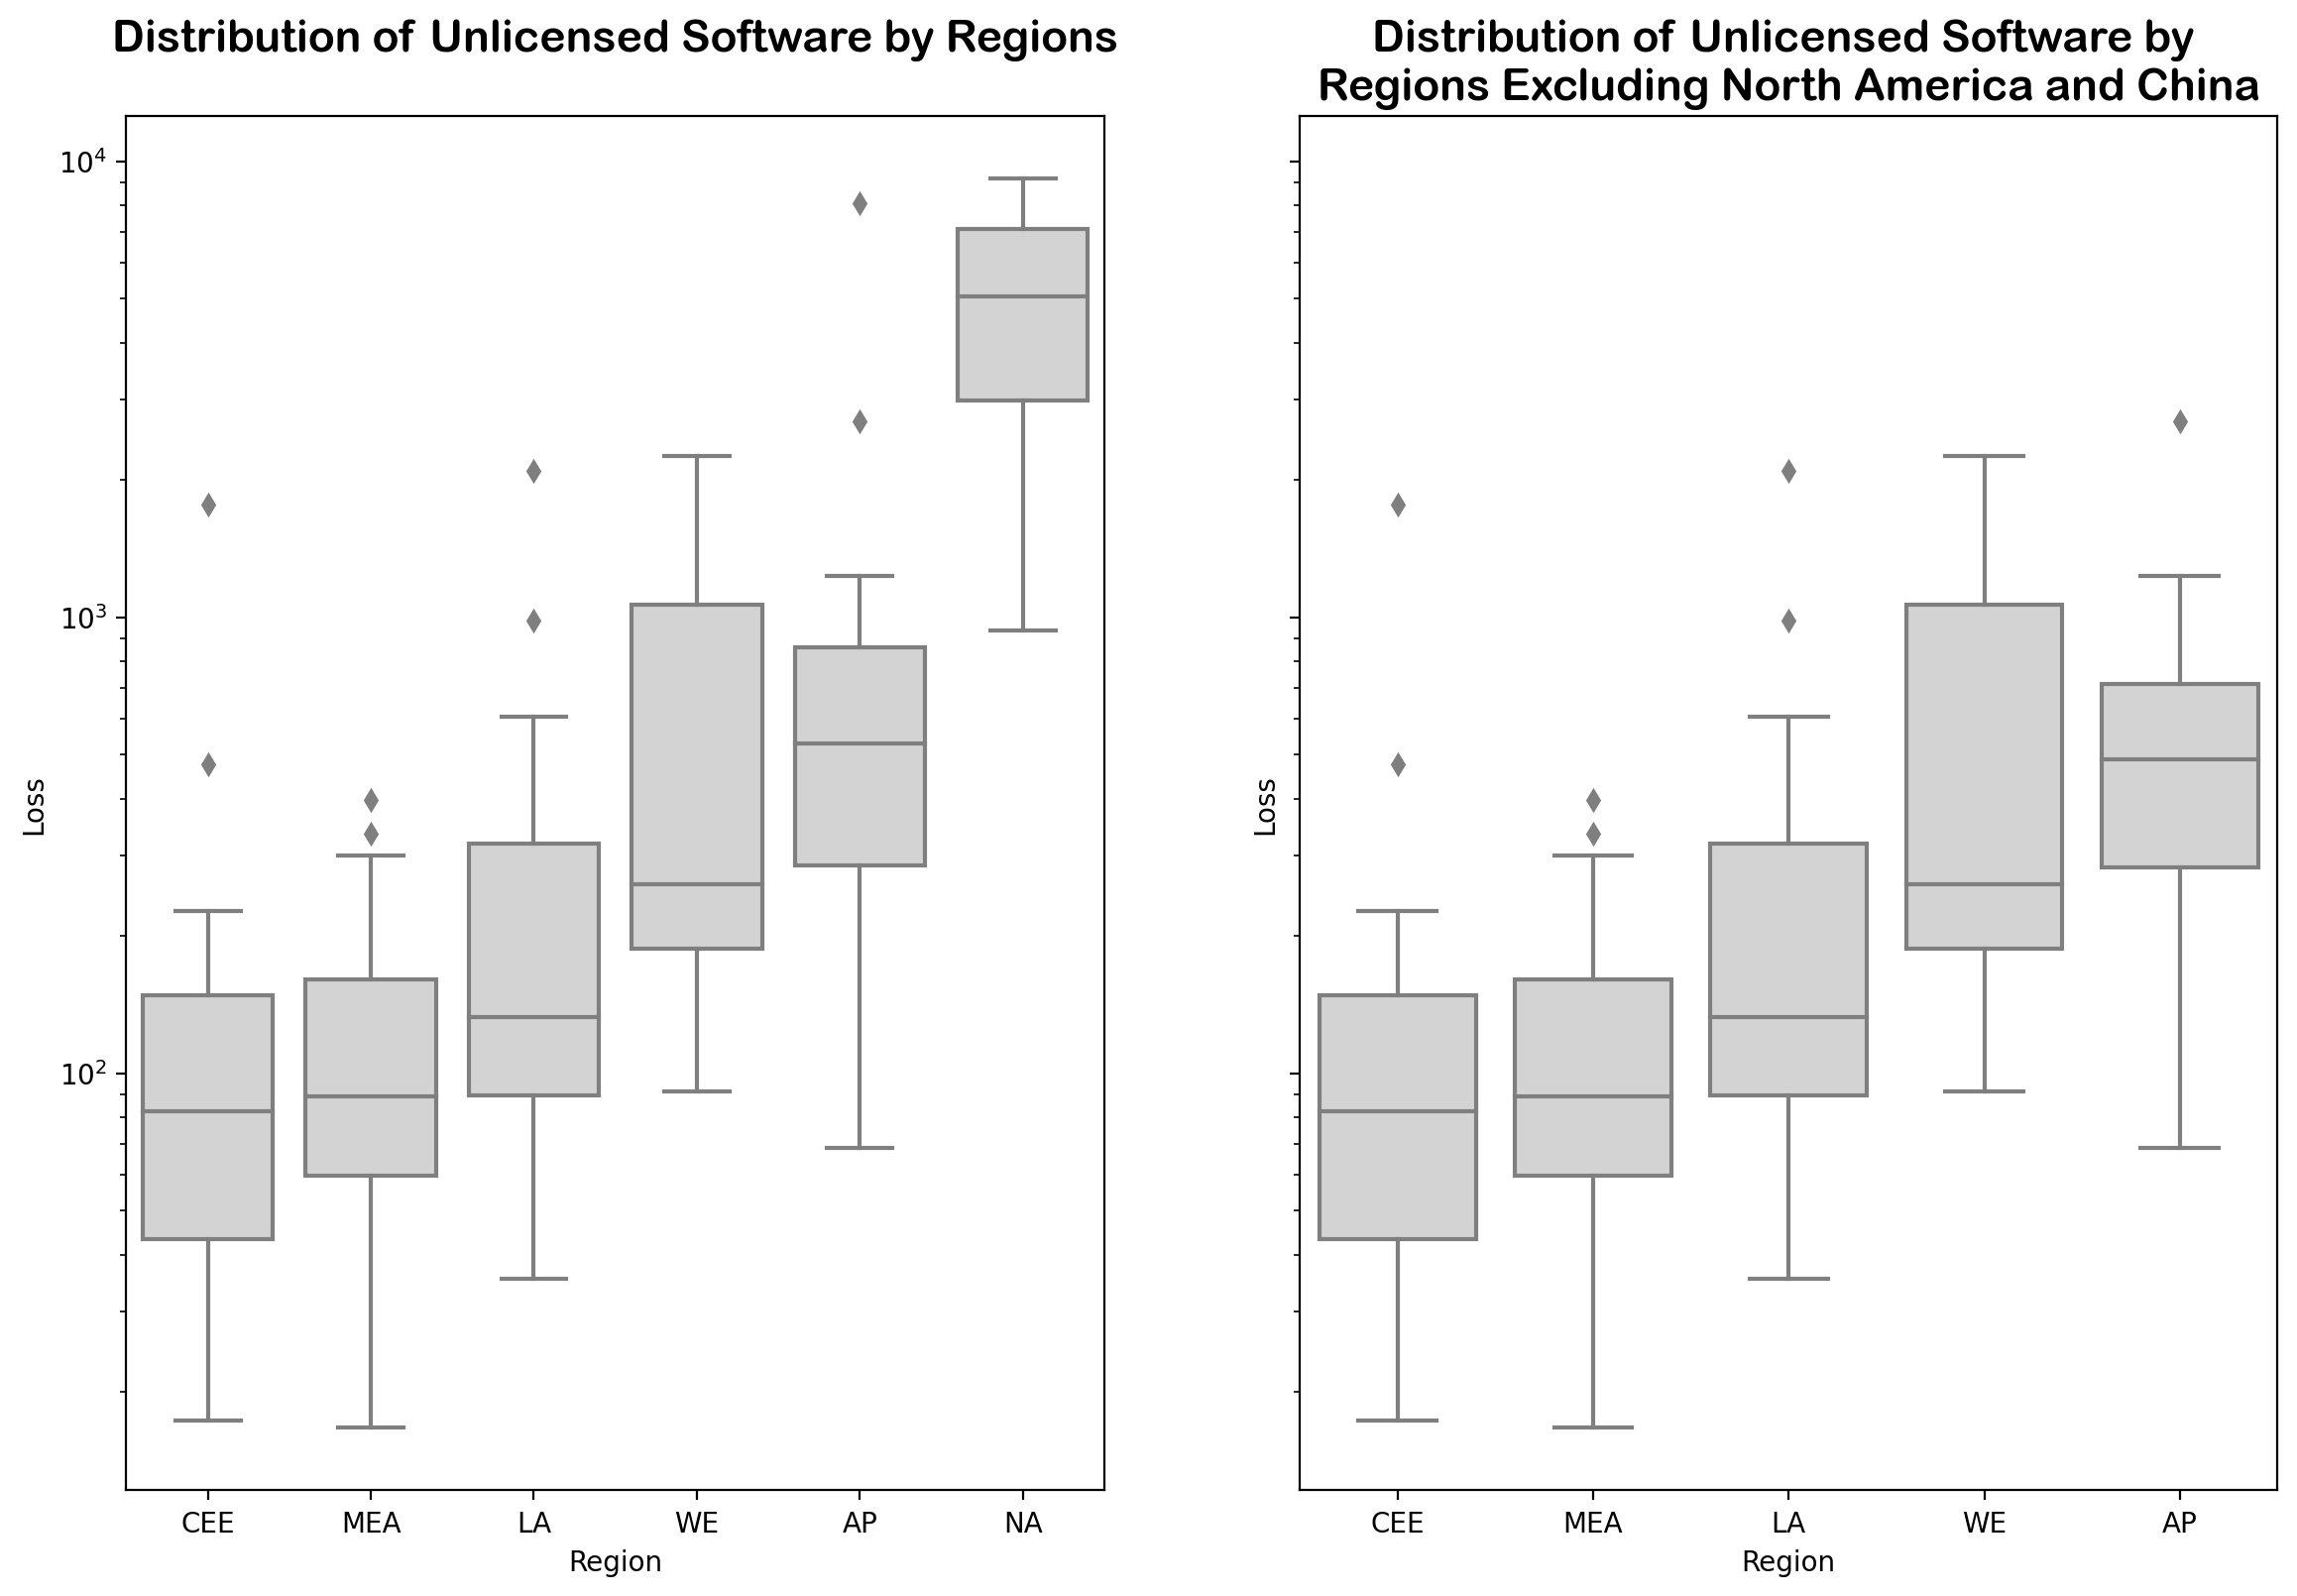

In [100]:
# Box plot show outliner
fig, ax = plt.subplots(1, 2, figsize=(14,9), sharey=True)
x_axis, y_axis = "Region", "Loss"

sorted_mean1 = Income_Loss_avg.groupby("Region")["Loss"].median().sort_values().index
sorted_mean2 = Income_Loss_avg_exclude_China_NA.groupby("Region")["Loss"].median().sort_values().index

grid5 = sns.boxplot(x=x_axis, y=y_axis, data=Income_Loss_avg, order=sorted_mean1, ax=ax[0], color="lightgray")
grid5.set(yscale="log")
ax[0].set_title("Distribution of Unlicensed Software by Regions\n", 
                fontsize=16, fontname='Arial Rounded MT Bold')

grid6 = sns.boxplot(x=x_axis, y=y_axis, data=Income_Loss_avg_exclude_China_NA, order=sorted_mean2, ax=ax[1], color="lightgray")
ax[1].set_title("Distribution of Unlicensed Software by \nRegions Excluding North America and China", 
                fontsize=16, fontname='Arial Rounded MT Bold');

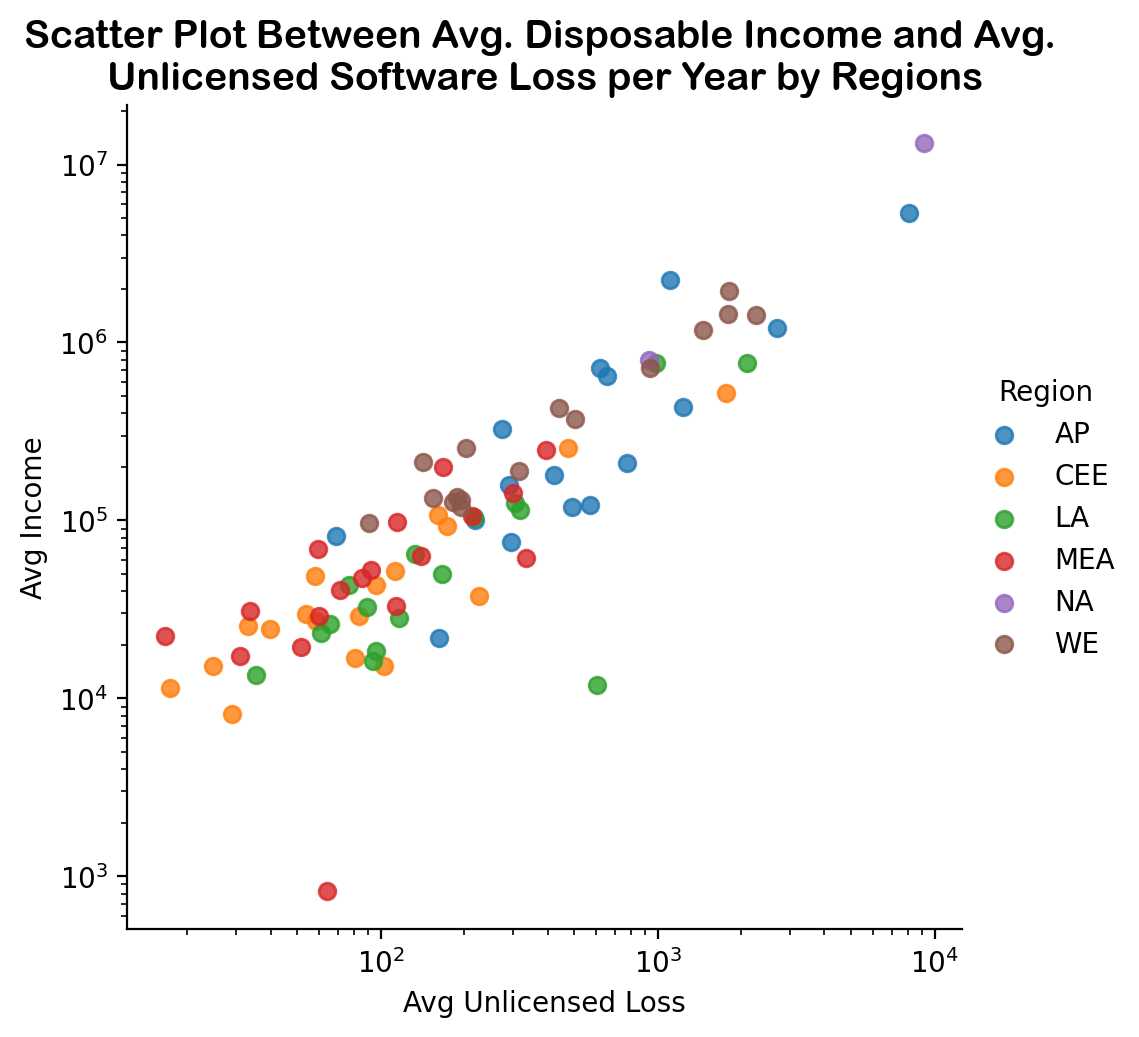

In [101]:
# Scatter Plot show correlation
grid7 = sns.lmplot(x="Loss", y="Income", data=Income_Loss_avg, hue="Region",
            ci=False, fit_reg=False)
grid7.set(xscale="log", yscale="log")
plt.ylabel("Avg Income")
plt.xlabel("Avg Unlicensed Loss")
plt.title("Scatter Plot Between Avg. Disposable Income and Avg. \nUnlicensed Software Loss per Year by Regions",
          fontsize=14, fontname='Arial Rounded MT Bold');

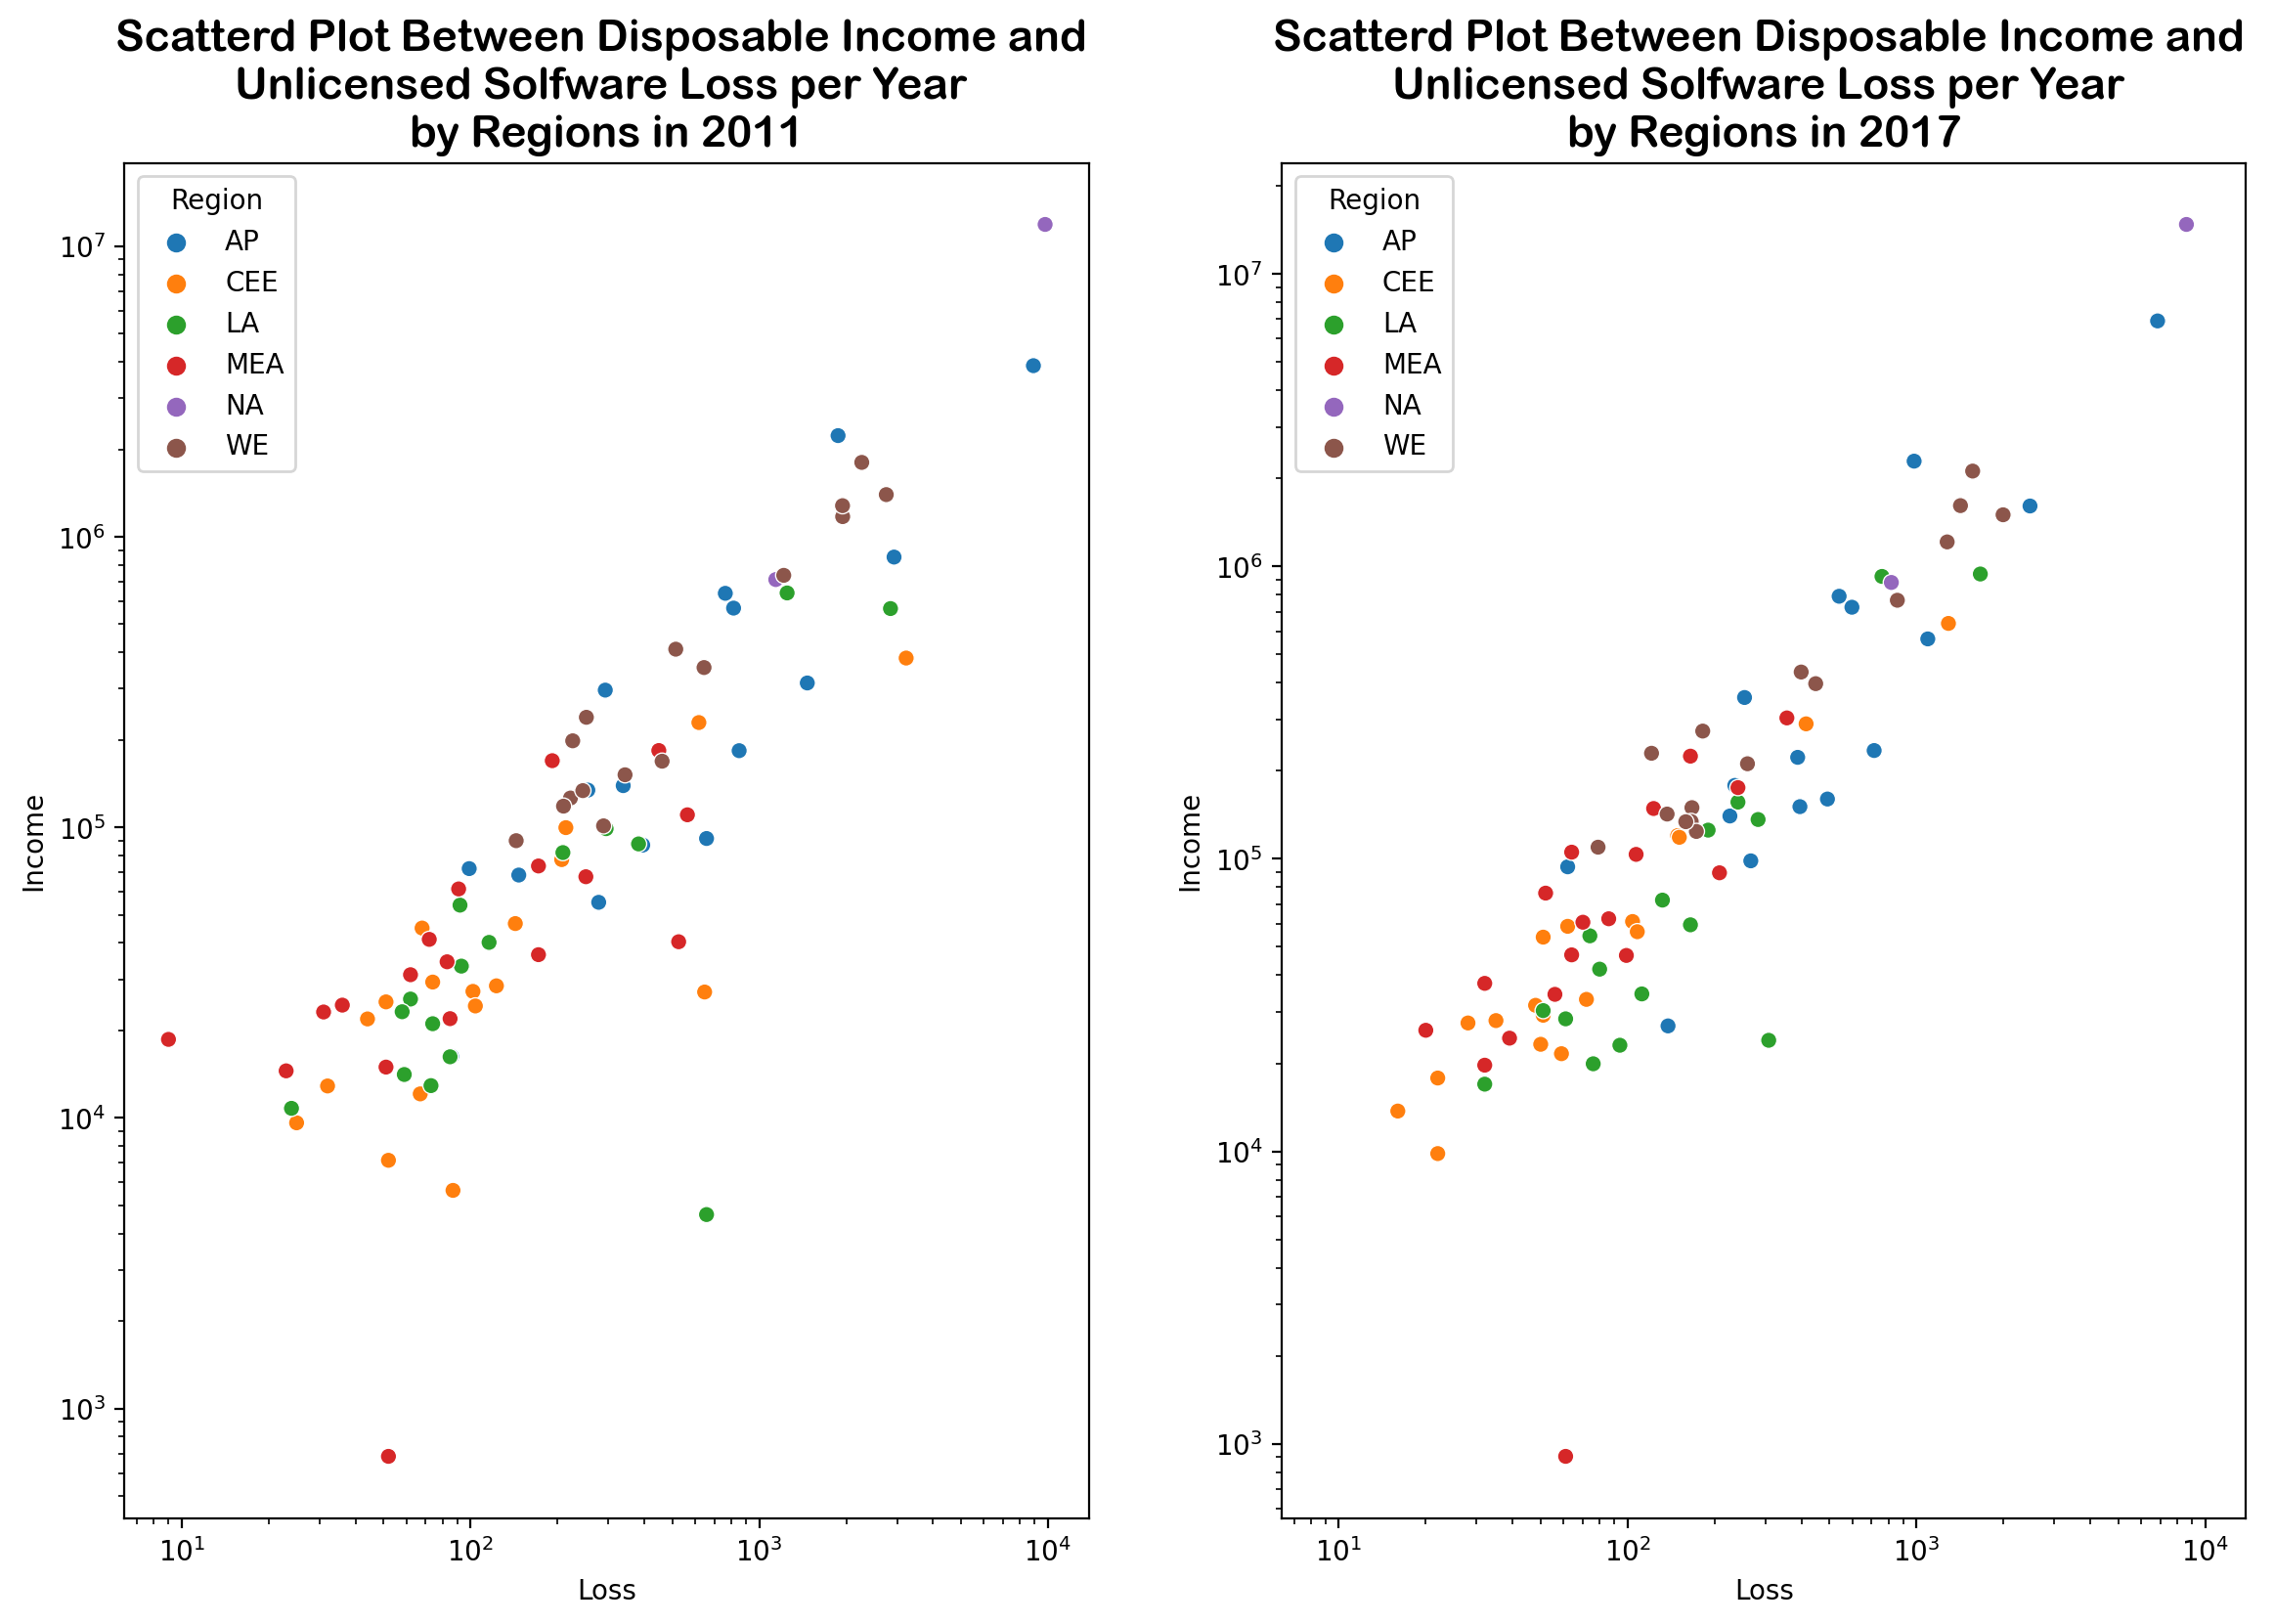

In [102]:
# Scatter 2 years compared
fig, ax = plt.subplots(1, 2, figsize=(14,9), sharex=True)
x_axis, y_axis = "Loss", "Income"

grid8 = sns.scatterplot(x=x_axis, y=y_axis, data=Income_Loss_2011, hue="Region", ax=ax[0])
ax[0].set_title("Scatterd Plot Between Disposable Income and \nUnlicensed Solfware Loss per Year \nby Regions in 2011",
                fontsize=16, fontname='Arial Rounded MT Bold')

grid9 = sns.scatterplot(x=x_axis, y=y_axis, data=Income_Loss_2017, hue="Region", ax=ax[1])
ax[1].set_title("Scatterd Plot Between Disposable Income and \nUnlicensed Solfware Loss per Year \nby Regions in 2017",
                fontsize=16, fontname='Arial Rounded MT Bold')
grid8.set(yscale="log", xscale="log")
grid9.set(yscale="log", xscale="log");

# Part 4: # T-T

![](https://i.redd.it/y8umtpe09b271.jpg)



In [103]:
Income_Loss_avg_percentage = pd.read_csv("https://github.com/purachai-phonwisut/machine_learning_project/raw/main/Data%20cleaned/raw/perct_income_adj.csv")
Income_Loss_avg_percentage['percent'] = Income_Loss_avg_percentage['percent'].str.replace('%', '').astype(float)
Income_Loss_avg_percentage.replace({np.nan: "NA"}, inplace=True)
Income_Loss_avg_percentage.rename(columns={"percent":"Percentage of Unlicensed Software Loss"}, inplace=True)
Income_Loss_avg_percentage

,Country,Region,Percentage of Unlicensed Software Loss,avg income
0,Lebanon,MEA,7.355,4.768763e+04
1,Argentina,LA,5.191,1.856436e+04
2,Ukraine,CEE,0.886,1.686167e+04
3,Sri Lanka,AP,0.660,7.154733e+05
4,Belarus,CEE,0.646,1.529260e+04
...,...,...,...,...
81,Belgium,WE,0.085,4.258656e+05
82,Austria,WE,0.077,1.454264e+06
83,United States,NA,0.070,1.323789e+07
84,Cameroon,MEA,0.066,6.141936e+04


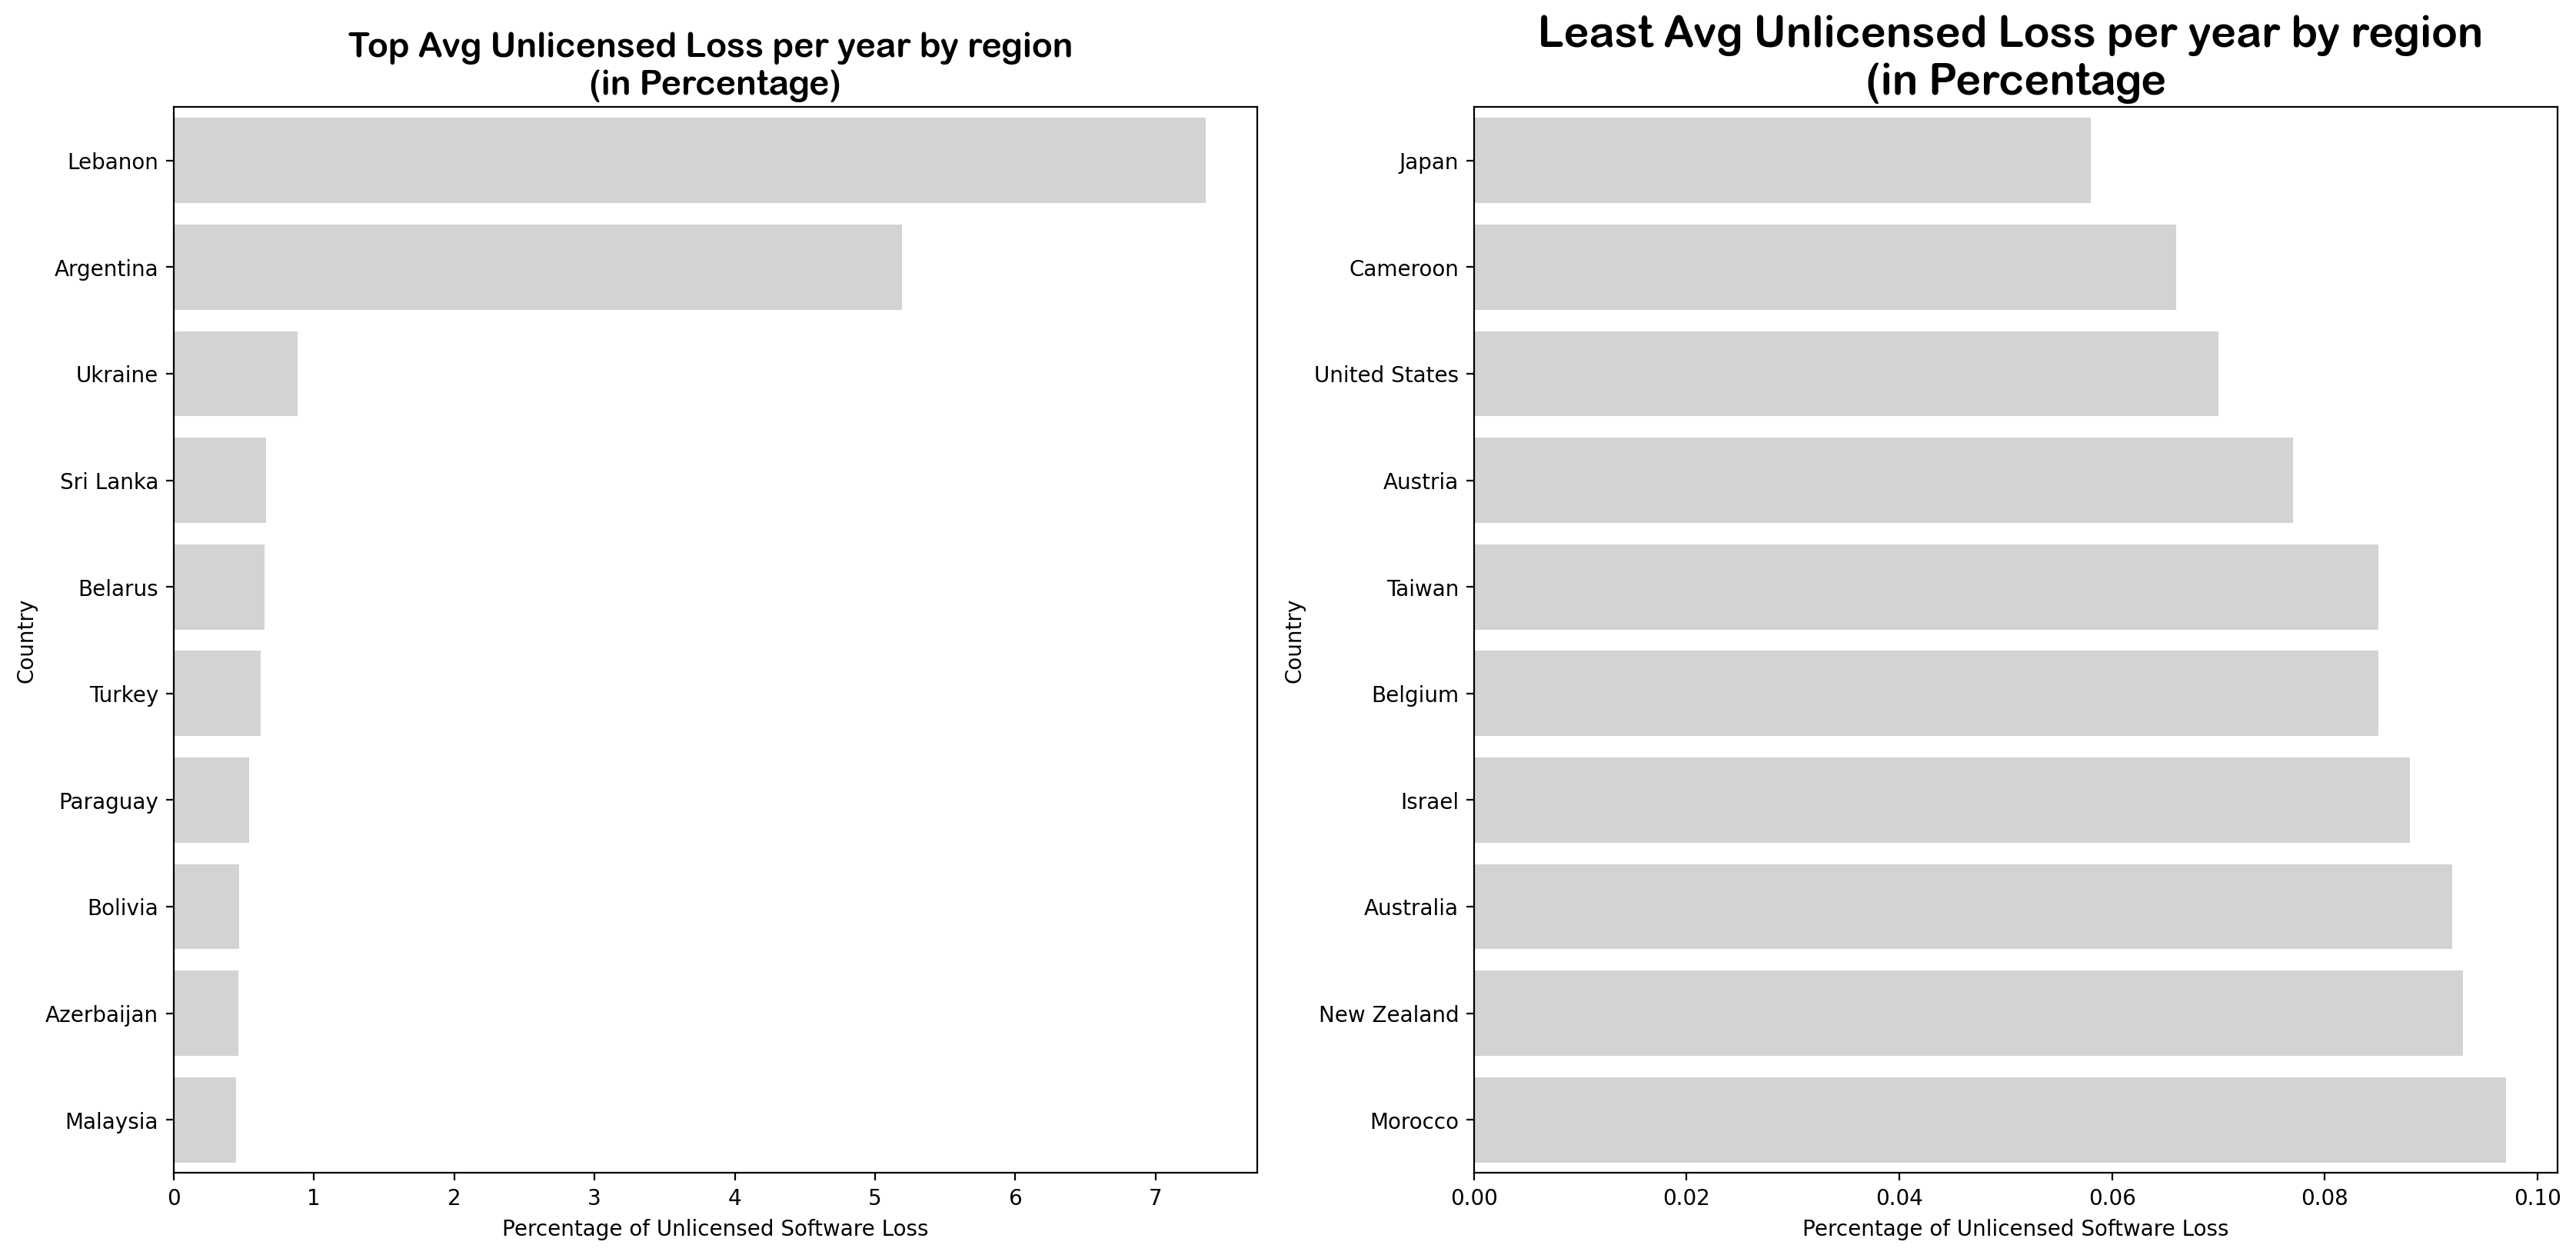

In [108]:
# Highest income & Lost by region
fig, ax = plt.subplots(1, 2, figsize=(20,9))
y_axis = "Country"

grid3 = sns.barplot(y=y_axis, x="Percentage of Unlicensed Software Loss", data=Income_Loss_avg_percentage.sort_values("Percentage of Unlicensed Software Loss", 
        ascending=False).head(10), ax=ax[0], color="lightgray")
ax[0].set_title("Top Avg Unlicensed Loss per year by region \n(in Percentage)",
                fontsize=16, fontname='Arial Rounded MT Bold')

grid4 = sns.barplot(y=y_axis, x="Percentage of Unlicensed Software Loss", data=Income_Loss_avg_percentage.sort_values("Percentage of Unlicensed Software Loss",
        ascending=True).head(10), ax=ax[1], color="lightgray")
ax[1].set_title("Least Avg Unlicensed Loss per year by region \n(in Percentage",
                fontsize=20, fontname='Arial Rounded MT Bold');


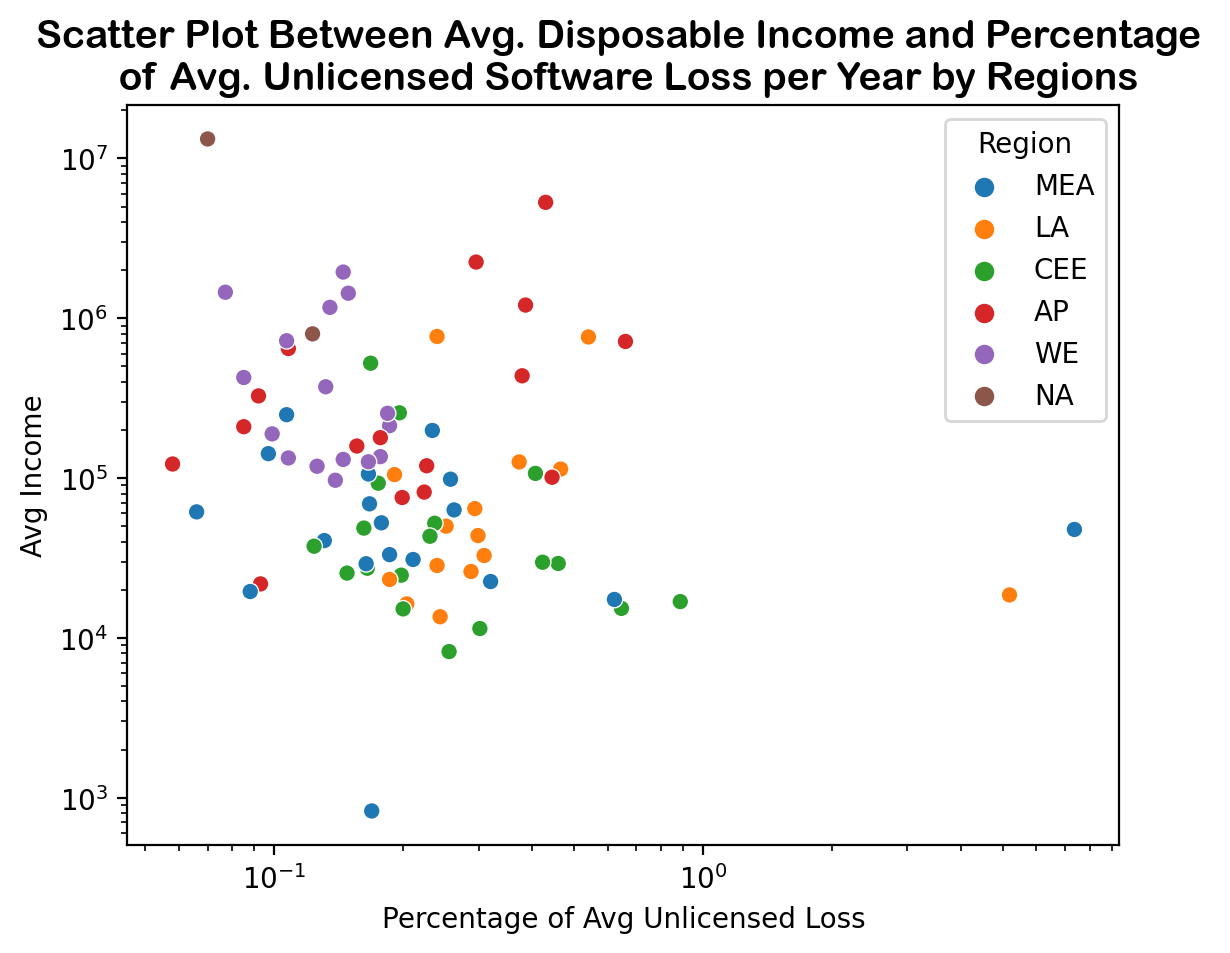

In [105]:
sns.scatterplot(x="Percentage of Unlicensed Software Loss", y="avg income",
                data=Income_Loss_avg_percentage,hue = 'Region').set(yscale="log", xscale="log")
plt.ylabel("Avg Income")
plt.xlabel("Percentage of Avg Unlicensed Loss")
plt.title("Scatter Plot Between Avg. Disposable Income and Percentage \n of Avg. Unlicensed Software Loss per Year by Regions",
          fontsize=14, fontname='Arial Rounded MT Bold');

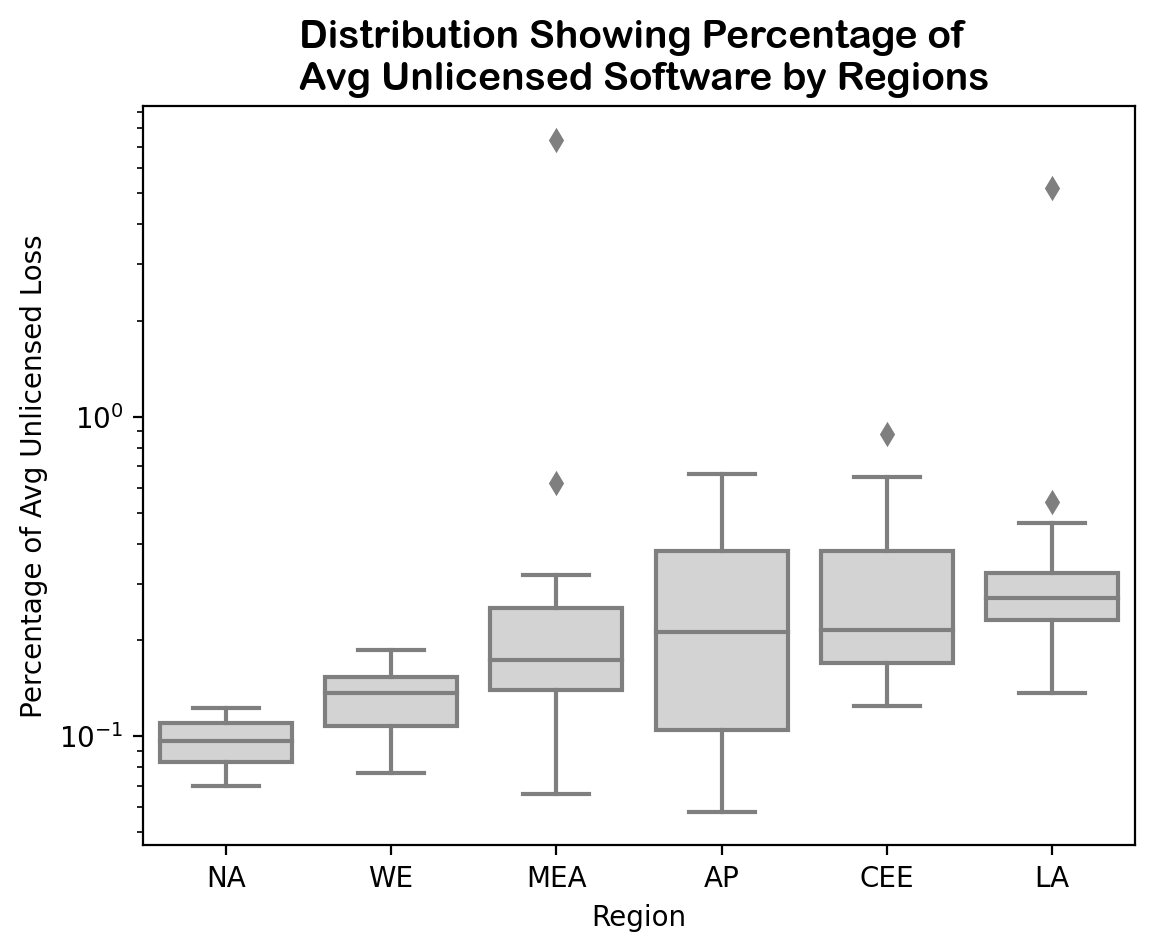

In [107]:
sorted_mean = Income_Loss_avg_percentage.groupby('Region')['Percentage of Unlicensed Software Loss'].median().sort_values().index
sns.boxplot(x = 'Region', y = 'Percentage of Unlicensed Software Loss', data = Income_Loss_avg_percentage, order = sorted_mean,
            color='lightgray').set(yscale="log")
plt.ylabel("Percentage of Avg Unlicensed Loss")
plt.title("Distribution Showing Percentage of \n Avg Unlicensed Software by Regions",
          fontsize=14, fontname='Arial Rounded MT Bold');